### ДЗ 2.2

In [2]:
%load_ext pycodestyle_magic
%flake8_on

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


Откроем JSON, который сделан пайморфом, так как его не придётся преобразовывать.

In [21]:
import json

with open('list_of_parsing.json', encoding='utf-8') as f:
    list_of_parsing = json.load(f)

#### 1. Перевести разметку в датафрейм, подобный тому, что был на семинаре
Выведем первые несколько строк:

In [22]:
import pandas
import matplotlib.pyplot as pyplot

dataframe = pandas.DataFrame(list_of_parsing)
dataframe[:50]

,word,pos,animacy,aspect,case,gender,involvement,mood,number,person,tense,transitivity,voice
0,метр,NOUN,inan,None,gent,masc,None,None,sing,None,None,None,None
1,правда,PRCL,None,None,None,None,None,None,None,None,None,None,None
2,1989,None,None,None,None,None,None,None,None,None,None,None,None
3,ocr,None,None,None,None,None,None,None,None,None,None,None,None
4,amp,None,None,None,None,None,None,None,None,None,None,None,None
5,spellcheck,None,None,None,None,None,None,None,None,None,None,None,None
6,by,None,None,None,None,None,None,None,None,None,None,None,None
7,harryfan,None,None,None,None,None,None,None,None,None,None,None,None
8,25,None,None,None,None,None,None,None,None,None,None,None,None
9,september,None,None,None,None,None,None,None,None,None,None,None,None


#### 2. Повторить какие-то из графиков с семинара на своих книжных данных (обязательно - 3 штуки, дальше по желанию)

##### 2.1. Вхождение слов по роду 

Text(0, 0.5, 'number of entries')

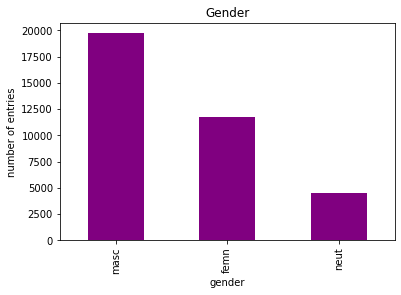

In [28]:
dataframe['gender'].value_counts().plot.bar(color='purple')
pyplot.title('Gender')
pyplot.xlabel('gender')
pyplot.ylabel('number of entries')

##### 2.2. Вхождение слов по роду по частям речи

Text(0, 0.5, 'number of entries')

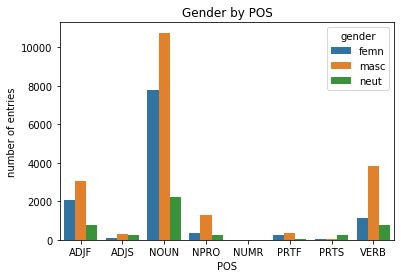

In [43]:
import seaborn as sns

dataframe2 = dataframe[
    (dataframe['gender'] != '') & (dataframe['gender'] != 'мж')
][
    ['pos', 'gender', 'number']
].groupby(['pos', 'gender'], as_index=False).count()

dataframe2.columns = ['pos', 'gender', 'total']
sns.barplot(x="POS", y="total", hue='gender', data=dataframe2)
pyplot.title('Gender by POS')
pyplot.xlabel('POS')
pyplot.ylabel('number of entries')

##### 2.3. Распределение длины лемм

Text(0.5, 0, 'Length of word')

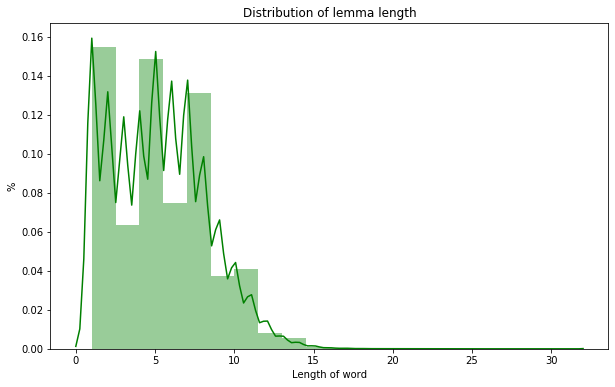

In [61]:
dataframe['length'] = dataframe['word'].apply(len)
pyplot.figure(figsize=(10, 6))
sns.distplot(dataframe['length'], bins=20, color='green')
pyplot.title('Distribution of lemma length')
pyplot.ylabel('%')
pyplot.xlabel('Length of word')

#### 3. Придумать свои визуализации
##### 3.1. Облако одушевлённых существительных
Любопытно было бы посмотреть, какие одушевлённые существительные встречаются чаще:

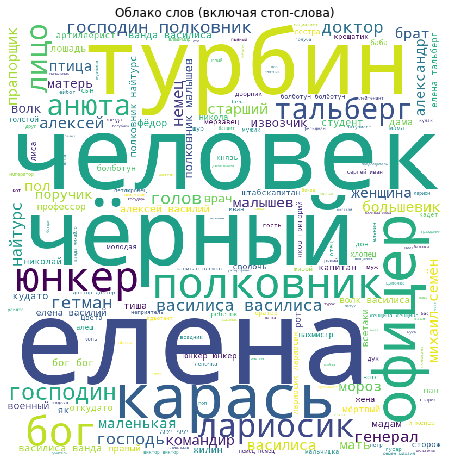

In [72]:
from wordcloud import WordCloud

df3 = dataframe[
    (dataframe['pos'] == 'NOUN') & (dataframe['animacy'] == 'anim')
][
    ['word', 'pos', 'animacy']
]

text = ' '.join([word for word in df3['word']])

wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
).generate(text)

pyplot.figure(figsize=(8, 8), facecolor=None)
pyplot.imshow(wordcloud)
pyplot.axis("off")
pyplot.title('Облако слов (включая стоп-слова)')
pyplot.show()

##### 3.2. Глаголы по времени
Идёт ли речь в романе о будущем, или автор концентрирован на описании исключительно прошлого? Может быть, это вселенская катастрофа и потом не будет ничего?

Text(0.5, 1.0, 'Case')

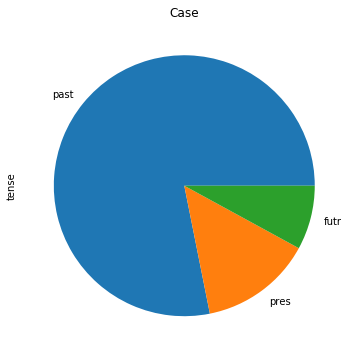

In [76]:
dataframe4 = dataframe[dataframe['pos'] == 'VERB']

pyplot.figure(figsize=(6, 6))
dataframe4['tense'].value_counts().plot(kind='pie')
pyplot.title('Case')

#### 4. Освоить nltk dispersion plot и сделать такой график по героям вашей книги
Возьмём троих основных персонажей, членов семьи Турбиных:

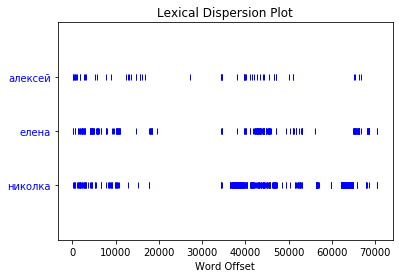

In [79]:
import nltk
from nltk.draw import dispersion_plot

words = ['алексей', 'елена', 'николка']
text = list(dataframe['word'])

dispersion_plot(text, words)